In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from sim_utils import *
from simulation import *

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### lda

In [4]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    }

lda_model_args = {
    "update_every": 1,
    "chunksize": 100,
    "passes": 10,
    "alpha": 0.1,
    "eta": 0.1,
    "per_word_topics": True,
}
model_type = "lda"
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[], "euclid":[]}

for i in range(num_simulations):
    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_args=doc_args
        )
    lda_model_args["random_state"] = i
    s.estimate_distributions(
        is_output=True,
        model_args=lda_model_args,
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th simulation".format(i+1))
    print("  ")

with open("../data/{}/score_dict_{}.pickle".format(model_type,num_simulations),"wb") as f:
    pickle.dump(score_dict,f)

100%|██████████| 5000/5000 [01:14<00:00, 66.82it/s]


date:2023-07-26 01:00:20.240076
finished 1th simulation
  


100%|██████████| 5000/5000 [01:15<00:00, 66.27it/s]


date:2023-07-26 01:01:49.007395
finished 2th simulation
  


100%|██████████| 5000/5000 [01:15<00:00, 66.54it/s]


date:2023-07-26 01:03:18.039383
finished 3th simulation
  


100%|██████████| 5000/5000 [01:19<00:00, 62.63it/s]


date:2023-07-26 01:04:52.959977
finished 4th simulation
  


100%|██████████| 5000/5000 [01:22<00:00, 60.84it/s]


date:2023-07-26 01:06:28.553781
finished 5th simulation
  


In [6]:
score_dict

{'cossim': [[0.9645078136546092,
   0.754816885188826,
   0.9477744879119799,
   0.9490124788789264,
   0.9476396623344225,
   0.9516540520385071,
   0.9115145055957791,
   0.9578613513756047,
   0.9416584151071057,
   0.95208278643456,
   0.9256353962723811,
   0.9557217980331119,
   0.9347491336514503,
   0.9416722425040412,
   0.9080474756830784,
   0.9423613169452674,
   0.9427881692832238,
   0.9573781786062323,
   0.9696445411396651,
   0.4172112203361674],
  [0.9248463367212875,
   0.9556817802777826,
   0.9178770775613511,
   0.8458603255371797,
   0.9569079384263813,
   0.966082096885094,
   0.9432257118311179,
   0.9610367540993631,
   0.9551114602099587,
   0.941063894664222,
   0.9362317672386514,
   0.9461277096400523,
   0.8796690615235297,
   0.9441766593701408,
   0.9163041985058084,
   0.9674684839670139,
   0.9598592330912665,
   0.9382469177420697,
   0.958854280956459,
   0.8873872427762228],
  [0.8017413044855194,
   0.15437901416199531,
   0.9564617051385831,
   0

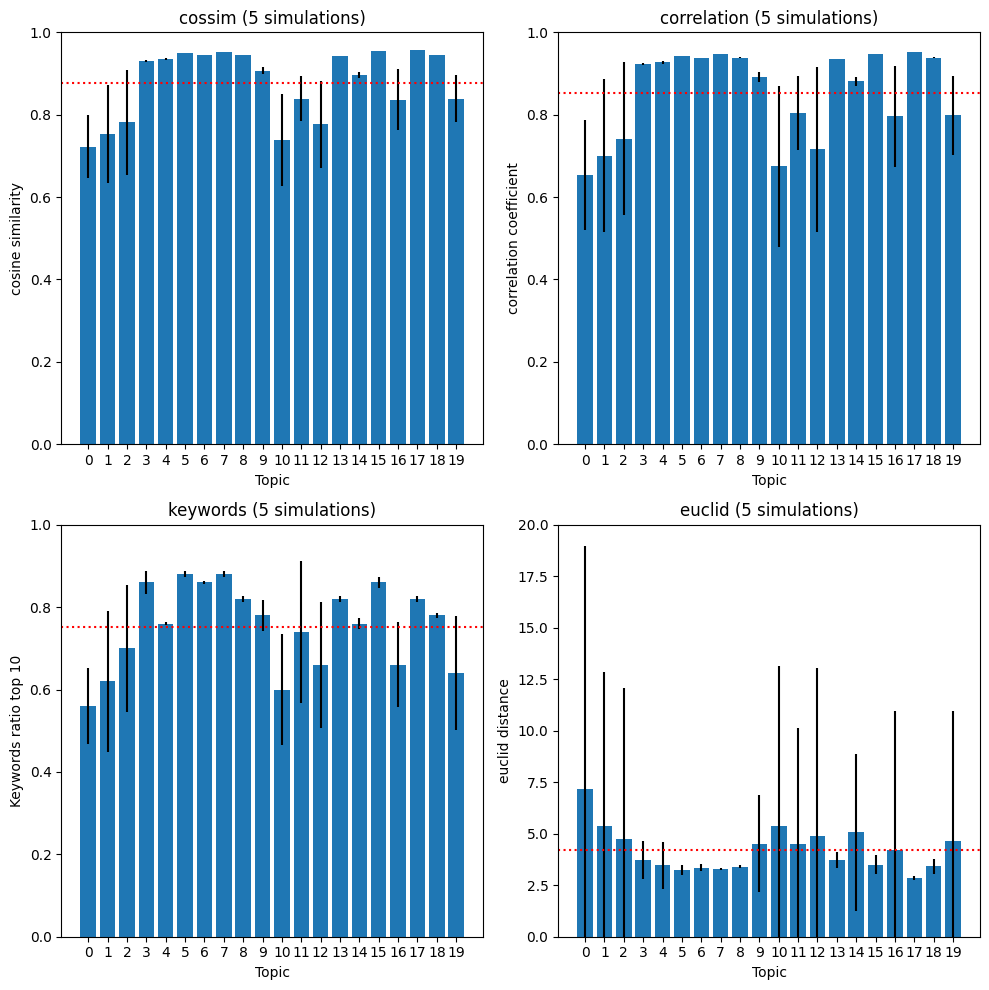

In [5]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 20)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations)".format(score_type_list[i],num_simulations,))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()